In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', 12)

Data cleaning functions.  Used the USAPL Rulebook from 2021. potential issue: data is from 2017.

In [3]:
def assign_tier(age, division):
    if 'open' in division.lower() or '-o' in division.lower():
        return np.nan
    elif division.lower == 'teens':
        return '3'
    elif '1a' in division.lower():
        return '1a'
    elif '1b' in division.lower():
        return '1b'
    elif '2a' in division.lower():
        return '2a'
    elif '2b' in division.lower():
        return '2b'
    elif '3a' in division.lower():
        return '3a'
    elif '3b' in division.lower():
        return '3b'
    elif '4a' in division.lower():
        return '4a'
    elif '4b' in division.lower():
        return '4b'
    elif '5a' in division.lower():
        return '5a'
    elif '5b' in division.lower():
        return '5b'
    elif '6a' in division.lower():
        return '6a'
    elif '6b' in division.lower():
        return '6b'
    elif 'jr' in division.lower() or 'jnr' in division.lower() or 'junior' in division.lower():
        return np.nan
    elif age < 10:
        return str(1)
    elif age < 12:
        return str(2)
    elif '11' in division:
        return str(2)
    elif age < 14:
        return str(3)
    elif '13' in division:
        return str(3)
    elif age < 16:
        return str(1)
    elif '15' in division:
        return str(1)
    elif age < 18:
        return str(2)
    elif '17' in division:
        return str(2)
    elif age < 20:
        return str(3)
    elif '19' in division:
        return str(3)
    elif age < 25:
        return np.nan
    elif '24' in division:
        return np.nan
    elif age < 40:
        return np.nan
    elif age < 45:
        return '1a'
    elif '44' in division:
        return '1a'
    elif age < 50:
        return '1b'
    elif '49' in division or 'm1' in division.lower():
        return '1b'
    elif age < 55:
        return '2a'
    elif '54' in division:
        return '2a'
    elif age < 60:
        return '2b'
    elif '59' in division or 'm2' in division.lower():
        return '2b'
    elif age < 65:
        return '3a'
    elif '64' in division:
        return '3a'
    elif age < 70:
        return '3b'
    elif '69' in division or 'm3' in division.lower():
        return '3b'
    elif age < 75:
        return '4a'
    elif '74' in division:
        return '4a'
    elif age < 80:
        return '4b'
    elif '79' in division or 'm5' in division.lower():
        return '4b'
    elif age < 85:
        return '5a'
    elif '84' in division:
        return '5b'
    elif age < 90:
        return '6b'
    elif '89' in division or 'm6' in division.lower():
        return '6b'
    elif age >= 90:
        return '6b'
    else:
        return np.nan

In [4]:
def assign_level(age, division):
    if 'open' in division.lower() or '-s' in division.lower():
        return 'Open'
    elif age < 14:
        return 'Youth'
    elif '14' in division:
        return 'Youth'
    elif age < 20:
        return 'Teen'
    elif '16' in division or 'teen' in division.lower():
        return 'Teen'
    elif '18' in division:
        return 'Teen'
    elif age < 25:
        return 'Juniors'
    elif 'jr' in division.lower() or 'jnr' in division.lower() or 'junior' in division.lower() or  '-j' in division.lower():
        return 'Juniors'
    elif age < 40:
        return 'Open'
    elif 'master' in division.lower():
        return 'Masters'
    elif age >= 40:
        return 'Masters'
    else:
        return np.nan

In [5]:
def assign_level2(tier, level):
    if 'a' in tier or 'b' in tier:
        return 'Masters'
    else:
        np.nan

In [6]:
def assign_open_level(division):
    if ('guest' in division.lower() or \
        'disabled' in division.lower() or \
        'novice' in division.lower() or \
        'special' in division.lower() or \
        'amateur' in division.lower() or \
        'handycap' in division.lower() or \
        'veteran' in division.lower() or \
        'wheel' in division.lower()):
        return 'Special'
    else:
        return np.nan

In [103]:
lifts_raw = pd.read_csv('openpowerlifting.csv')

In [104]:
print(lifts_raw.isnull().sum())

MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               239267
Division           15843
BodyweightKg        2402
WeightClassKg       3812
Squat4Kg          385171
BestSquatKg        88343
Bench4Kg          384452
BestBenchKg        30050
Deadlift4Kg       383614
BestDeadliftKg     68567
TotalKg            23177
Place               1092
Wilks              24220
dtype: int64


I should have checked the amount of null in age before i attempted to calculate division based on age.  There are 15k plus null divisions.

In [105]:
print(lifts_raw.nunique())

MeetID              8482
Name              136687
Sex                    2
Equipment              5
Age                  167
Division            4246
BodyweightKg        9110
WeightClassKg         51
Squat4Kg             438
BestSquatKg         1507
Bench4Kg             526
BestBenchKg         1470
Deadlift4Kg          573
BestDeadliftKg      1385
TotalKg             4340
Place                 81
Wilks              64827
dtype: int64


there are 4246 unique divisions

In [106]:
lifts = lifts_raw.copy()
lifts['Division'] = lifts['Division'].fillna('').astype(str)
del lifts['Squat4Kg']
del lifts['Bench4Kg']
del lifts['Deadlift4Kg']

In [107]:
lifts.loc[lifts['WeightClassKg'] == '90+', 'WeightClassKg'] = 90
lifts.loc[lifts['WeightClassKg'] == '100+', 'WeightClassKg'] = 100
lifts.loc[lifts['WeightClassKg'] == '110+', 'WeightClassKg'] = 110
lifts.loc[lifts['WeightClassKg'] == '83+', 'WeightClassKg'] = 85
lifts.loc[lifts['WeightClassKg'] == '120+', 'WeightClassKg'] = 120
lifts.loc[lifts['WeightClassKg'] == '140+', 'WeightClassKg'] = 140
lifts.loc[lifts['WeightClassKg'] == '125+', 'WeightClassKg'] = 125
lifts.loc[lifts['WeightClassKg'] == '145+', 'WeightClassKg'] = 145
lifts.loc[lifts['WeightClassKg'] == '84+', 'WeightClassKg'] = 85
lifts.loc[lifts['WeightClassKg'] == '70+', 'WeightClassKg'] = 70
lifts.loc[lifts['WeightClassKg'] == '75+', 'WeightClassKg'] = 75
lifts.loc[lifts['WeightClassKg'] == '67.5+', 'WeightClassKg'] = 70
lifts.loc[lifts['WeightClassKg'] == '60+', 'WeightClassKg'] = 65


In [108]:
lifts['Level'] = lifts.apply(lambda row: assign_level(row['Age'], row['Division']), axis=1)

In [109]:
lifts['Tier'] = lifts.apply(lambda row: assign_tier(row['Age'], row['Division']), axis=1)

In [110]:
lifts['Tier'] = lifts['Tier'].fillna('').astype(str)

In [111]:
lifts['Level2'] = lifts.apply(lambda row: assign_level2(row['Tier'], row['Level']), axis=1)

In [112]:
lifts['OpenLevel'] = lifts['Division'].apply(assign_open_level)

In [113]:
lifts['OpenLevel'] = lifts['OpenLevel'].fillna(lifts['Level'])

In [114]:
lifts['OpenLevel'] = lifts['OpenLevel'].fillna(lifts['Level2'])

In [115]:
lifts['Level'] = lifts['OpenLevel']
del lifts['OpenLevel']

In [116]:
lifts['Division2'] = lifts['Division']
lifts['Division'] = lifts['Level'] + ' ' + lifts['Tier'].fillna(str(1))

In [117]:
lifts['WeightClassKg'] = lifts['WeightClassKg'].astype(float)  
lifts['WeightClassKg'] = (lifts['WeightClassKg'] / 5).round() * 5 

In [118]:
lifts.to_csv('lifts_data.csv', index=False)

In [119]:
print(lifts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386414 entries, 0 to 386413
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          386414 non-null  int64  
 1   Name            386414 non-null  object 
 2   Sex             386414 non-null  object 
 3   Equipment       386414 non-null  object 
 4   Age             147147 non-null  float64
 5   Division        277065 non-null  object 
 6   BodyweightKg    384012 non-null  float64
 7   WeightClassKg   382602 non-null  float64
 8   BestSquatKg     298071 non-null  float64
 9   BestBenchKg     356364 non-null  float64
 10  BestDeadliftKg  317847 non-null  float64
 11  TotalKg         363237 non-null  float64
 12  Place           385322 non-null  object 
 13  Wilks           362194 non-null  float64
 14  Level           277065 non-null  object 
 15  Tier            386414 non-null  object 
 16  Level2          54874 non-null   object 
 17  Division2 

there are 386,414 total observations in the file.  some of the bestlift columns are missing data.

In [66]:
print(lifts.describe())

              MeetID            Age   BodyweightKg    BestSquatKg  \
count  386414.000000  147147.000000  384012.000000  298071.000000   
mean     5143.015804      31.668237      86.934912     176.569941   
std      2552.099838      12.900342      23.140843      69.222785   
min         0.000000       5.000000      15.880000    -477.500000   
25%      2979.000000      22.000000      70.300000     127.500000   
50%      5960.000000      28.000000      83.200000     174.630000   
75%      7175.000000      39.000000     100.000000     217.720000   
max      8481.000000      95.000000     242.400000     573.790000   

         BestBenchKg  BestDeadliftKg        TotalKg          Wilks  
count  356364.000000   317847.000000  363237.000000  362194.000000  
mean      118.347509      195.040633     424.000249     301.080601  
std        54.848850       61.580675     196.355147     116.360396  
min      -522.500000     -410.000000      11.000000      13.730000  
25%        79.380000      147.500

There are negative values in some of the best lift columns

my cleaning logic managed to assign all but 408 divisions.  

In [67]:
print(lifts.isnull().sum())

MeetID                 0
Name                   0
Sex                    0
Equipment              0
Age               239267
Division          109349
BodyweightKg        2402
WeightClassKg       3812
BestSquatKg        88343
BestBenchKg        30050
BestDeadliftKg     68567
TotalKg            23177
Place               1092
Wilks              24220
Level             109349
Tier                   0
Level2            331540
Division2              0
dtype: int64


There are 109k divisions left null.  minus the 15k that started as null, and we find we were unable to calculate a category for ~95k.  seems high but some are nonsense.  i will move forward with this.

In [68]:
print(lifts.nunique())

MeetID              8482
Name              136687
Sex                    2
Equipment              5
Age                  167
Division              63
BodyweightKg        9110
WeightClassKg         50
BestSquatKg         1507
BestBenchKg         1470
BestDeadliftKg      1385
TotalKg             4340
Place                 81
Wilks              64827
Level                  6
Tier                  15
Level2                 1
Division2           4247
dtype: int64


I now have 63 unique divisions.  much better. too many.  i think my logic is creating tiers in open or junior divs.

In [69]:
print(lifts.duplicated().sum())

545


I would think duplicates should not happen.  I could clean this up but the duplicaiton rate is  0.01%.  NBD

At this point, i will call my initial iteration of the dataset clean. (note from future derick, you are not done)

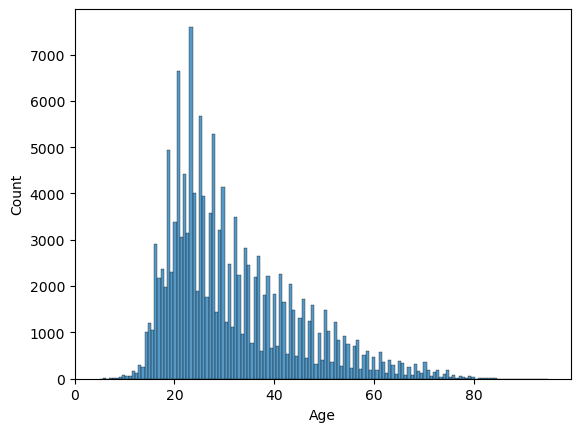

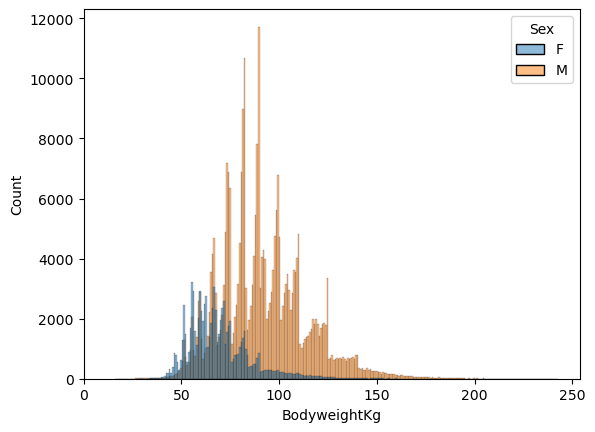

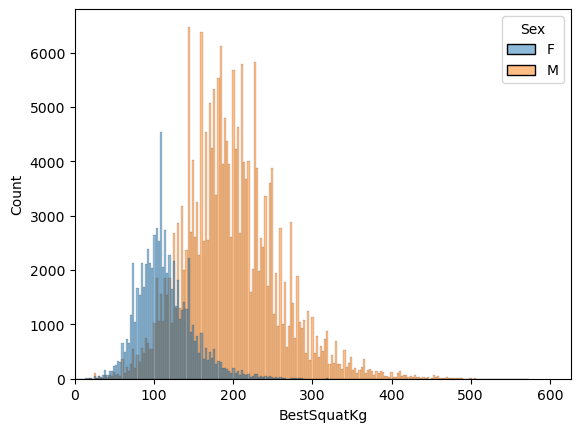

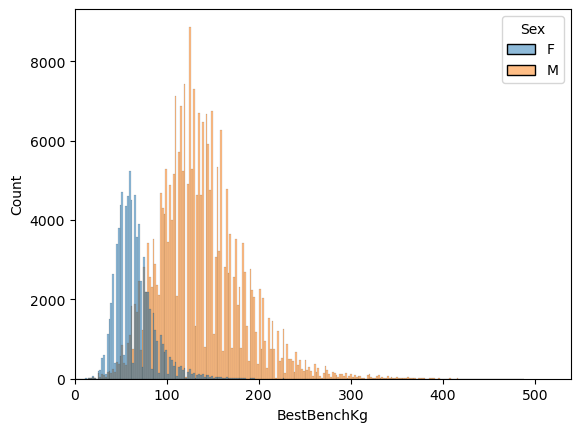

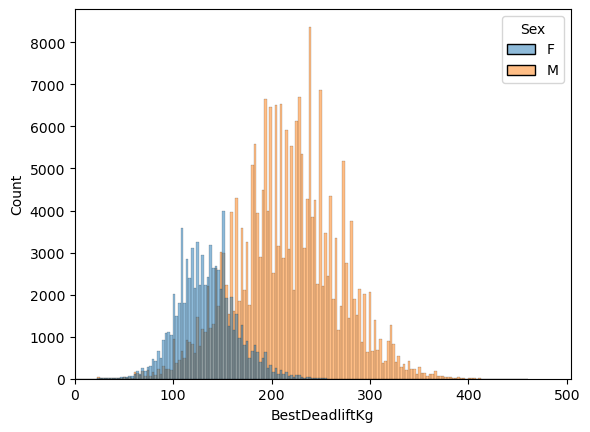

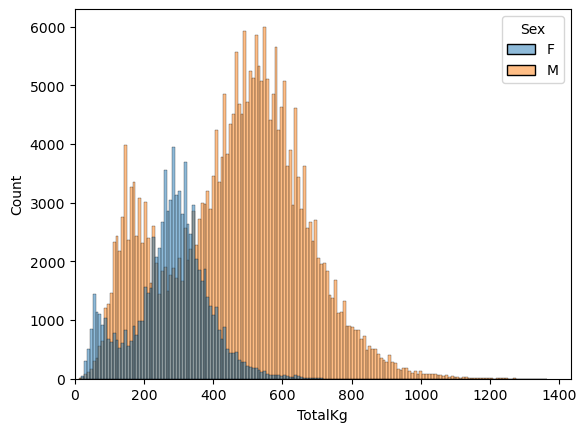

In [70]:
sns.histplot(lifts['Age'])
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='BodyweightKg', hue='Sex')
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='BestSquatKg', hue='Sex')
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='BestBenchKg', hue='Sex')
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='BestDeadliftKg', hue='Sex')
plt.xlim(left=0)
plt.show()

sns.histplot(data=lifts, x='TotalKg', hue='Sex')
plt.xlim(left=0)
plt.show()

the totalkg hist shows bi-modality in both males and females.  WHY???

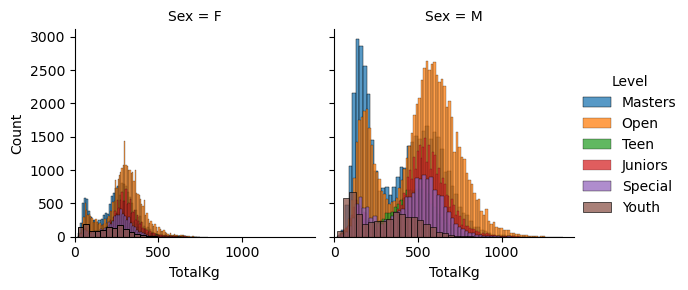

In [71]:
# create two separate histograms for males and females
g = sns.FacetGrid(lifts, col='Sex', hue='Level')
g.map(sns.histplot, 'TotalKg')
g.set(xlim=(0, None))
g.add_legend()

Bimodality does not appear to be due to division.

In [72]:
#test for lifting div differences
print(lifts.groupby('Division')['TotalKg'].describe())
print(lifts.groupby('Level')['TotalKg'].describe())
print(lifts.groupby('Level')['BestSquatKg'].describe())


              count        mean         std    min      25%     50%      75%  \
Division                                                                       
Juniors     50084.0  448.019212  187.284795   20.0  303.900  470.00  582.870   
Juniors 1b      1.0  257.500000         NaN  257.5  257.500  257.50  257.500   
Juniors 3       6.0  469.166667  240.793826  260.0  335.000  371.25  525.625   
Juniors 6b      1.0  398.500000         NaN  398.5  398.500  398.50  398.500   
Masters     10429.0  383.837247  206.547389   25.0  204.120  355.00  555.000   
...             ...         ...         ...    ...      ...     ...      ...   
Youth 1b        1.0  120.000000         NaN  120.0  120.000  120.00  120.000   
Youth 2       183.0  144.195738   78.676019   17.0   96.250  142.50  183.750   
Youth 2b        2.0  268.750000  153.795725  160.0  214.375  268.75  323.125   
Youth 3       478.0  215.343787  113.362225   27.5  140.500  205.00  281.875   
Youth 3a        1.0  172.500000         

Rule out bimodality due to a certian division. I see we have some negative lifts.  Lets drop our disqualified individuals from the dataframe.

In [120]:
lifts = lifts[lifts['Place'] != 'DQ']

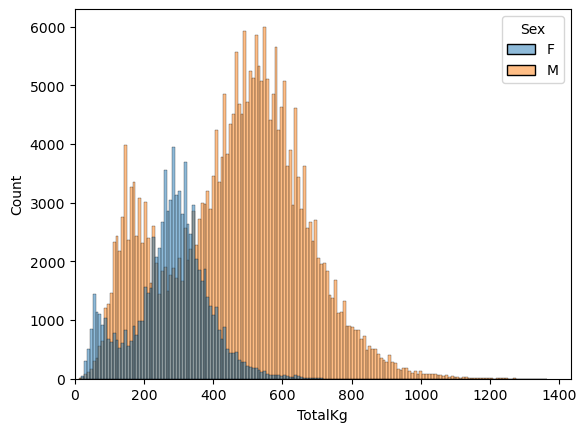

In [121]:
sns.histplot(data=lifts, x='TotalKg', hue='Sex')
plt.xlim(left=0)
plt.show()

Still bi-modal.

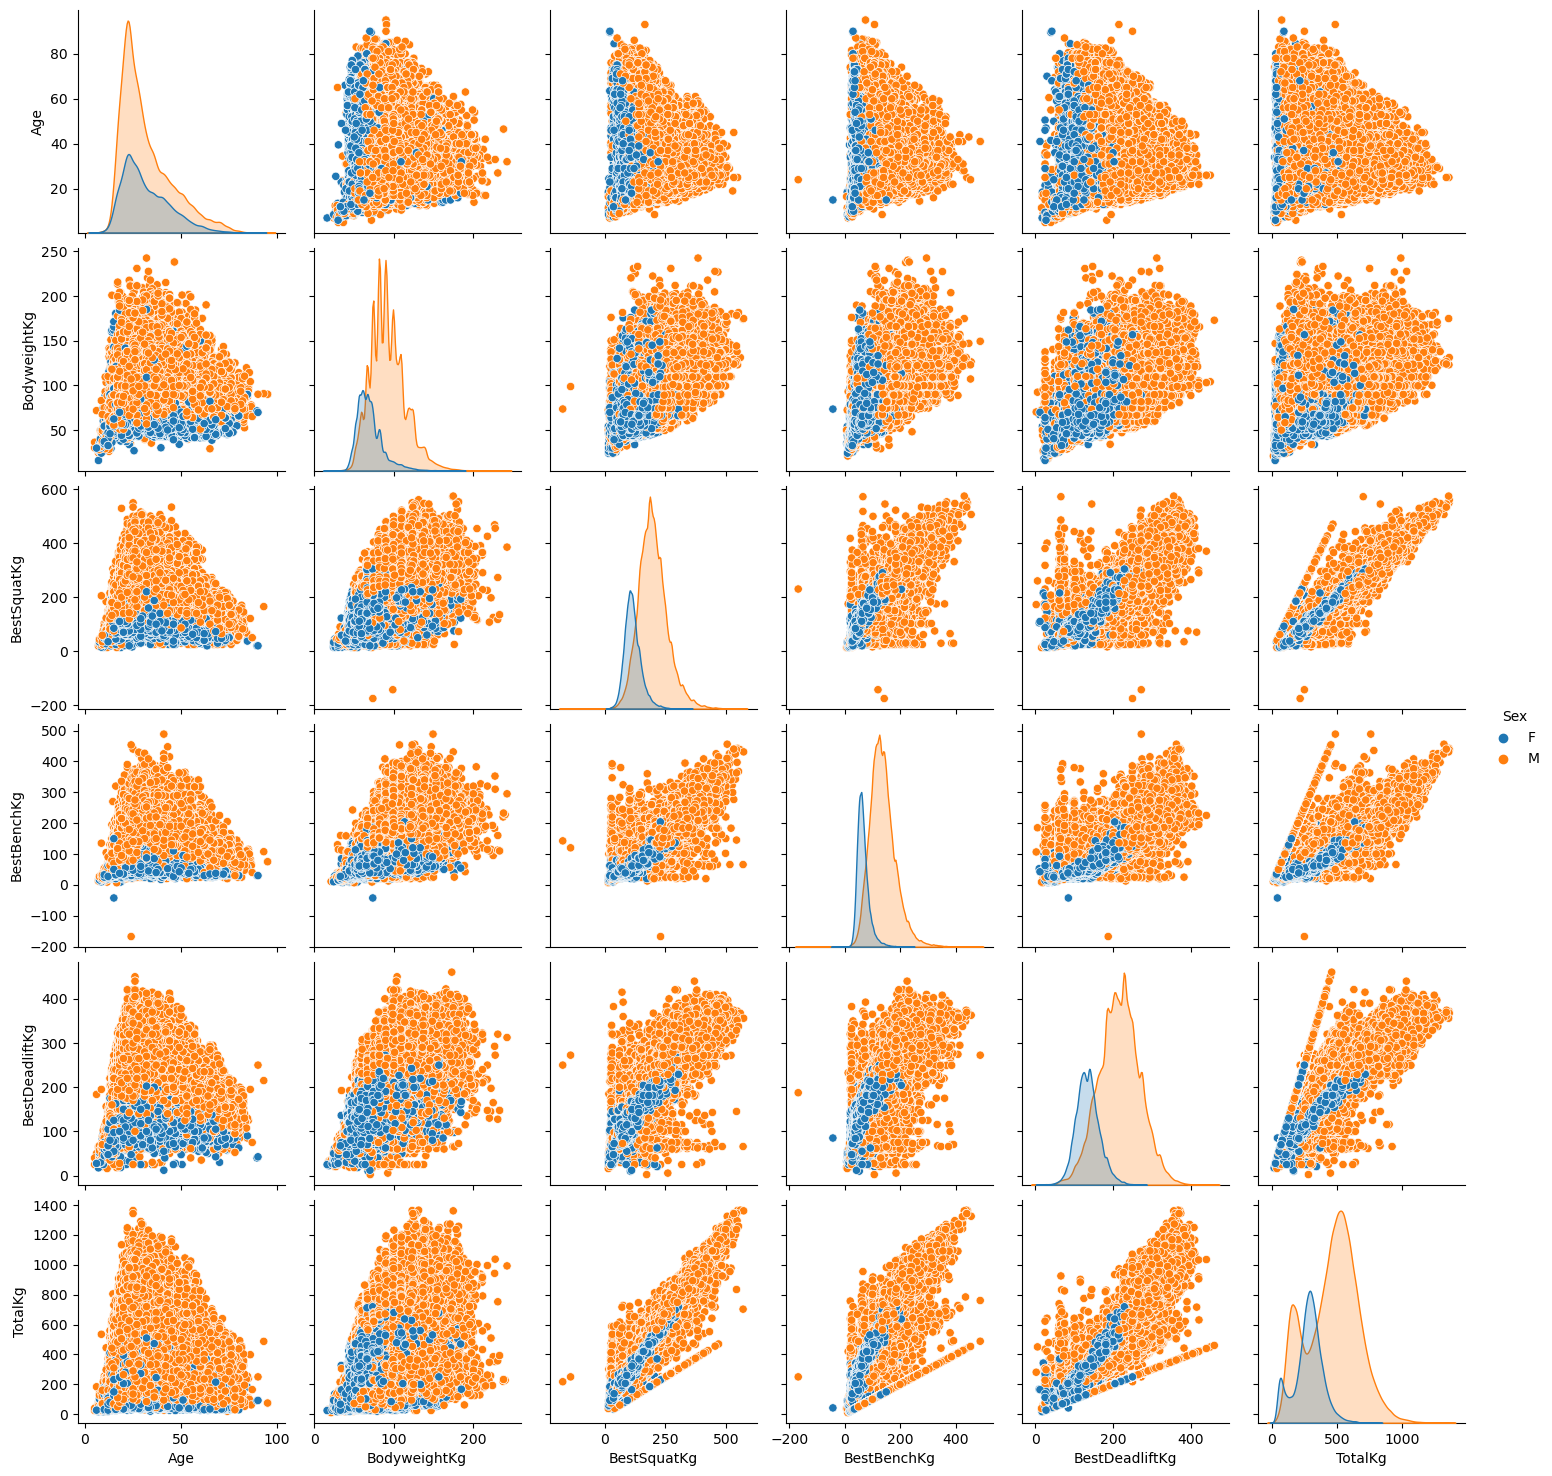

In [32]:
sns.pairplot(lifts[['Age','BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Sex']], hue='Sex')
plt.show()

Still bimodal, but what is interesting is the negative value outliers still showing and the linear trend on the outsides of some scatter plots.

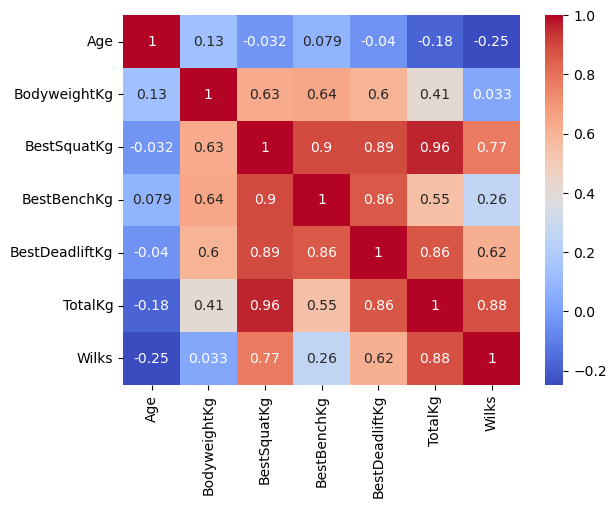

In [122]:
corr_matrix = lifts[['Age', 'BodyweightKg', 'BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Wilks']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [123]:
print(lifts['Sex'].value_counts())
print(lifts['Equipment'].value_counts())
print(lifts['Division'].value_counts())
print(lifts['WeightClassKg'].value_counts())

M    278936
F     84494
Name: Sex, dtype: int64
Raw           180063
Single-ply    130656
Wraps          44286
Multi-ply       8418
Straps             7
Name: Equipment, dtype: int64
Open          107724
Juniors        50106
Special        15416
Masters 1b     15063
Masters        10432
               ...  
Open 5a            1
Open 4a            1
Juniors 1b         1
Youth 3a           1
Youth 1b           1
Name: Division, Length: 63, dtype: int64
75.0     40722
90.0     37332
70.0     33688
100.0    32027
80.0     30877
85.0     26015
110.0    25882
125.0    25620
95.0     16440
60.0     14955
120.0    14311
55.0     14243
105.0    13171
65.0     12738
50.0     10531
140.0    10060
45.0      2161
40.0        78
35.0        66
30.0        43
145.0       27
155.0        1
Name: WeightClassKg, dtype: int64


Missing a lift impacts total, begin analysis of complete lifts.

In [124]:
complete_lifts = lifts.copy()
complete_lifts[['BestBenchKg', 'BestSquatKg', 'BestDeadliftKg']] = complete_lifts[['BestBenchKg', 'BestSquatKg', 'BestDeadliftKg']].applymap(lambda x: np.nan if x < 0 else x)
complete_lifts = complete_lifts.dropna(subset=['BestSquatKg', 'BestBenchKg', 'BestDeadliftKg'])

In [125]:
complete_lifts.to_csv('lifts_data.csv', index=False)

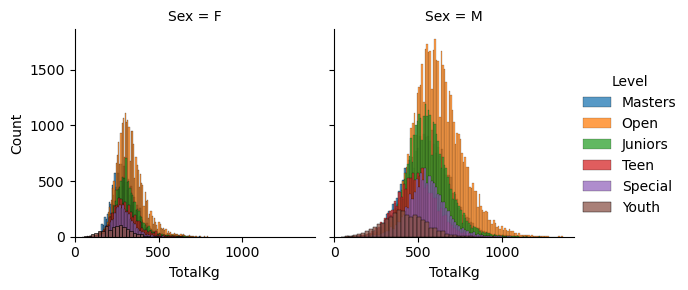

In [126]:
# create two separate histograms for males and females
g = sns.FacetGrid(complete_lifts, col='Sex', hue='Level')
g.map(sns.histplot, 'TotalKg')
g.set(xlim=(0, None))
g.add_legend()

BINGO, The bimodality is gone.  Lets find something to test.

In [127]:
categorical_vars = ['Sex', 'Equipment', 'Division', 'WeightClassKg']
target_var1 = 'Place'
target_var2 = 'TotalKg'

In [128]:
for var in categorical_vars:
    ct = pd.crosstab(lifts[var], lifts[target_var1])
    chi2, p, dof, expected = stats.chi2_contingency(ct)
    print(f"{var}: chi-square = {chi2:.2f}, p-value = {p:.4f}")

Sex: chi-square = 5402.42, p-value = 0.0000
Equipment: chi-square = 26046.06, p-value = 0.0000
Division: chi-square = 19653.05, p-value = 0.0000
WeightClassKg: chi-square = 12853.90, p-value = 0.0000


Equipment looks interesting.

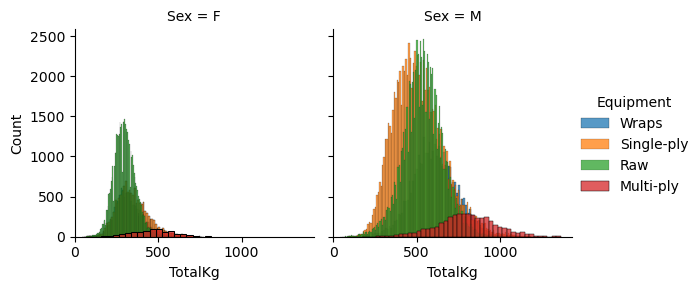

In [129]:
# create two separate histograms for males and females
g = sns.FacetGrid(complete_lifts, col='Sex', hue='Equipment')
g.map(sns.histplot, 'TotalKg')
g.set(xlim=(0, None))
g.add_legend()

Single ply use in males seems to have a slightly lower distribution than raw.  wondering if that is equipment that buffers an injury or something.  multi ply seems to give an advantage in both males and females but is not widely used.

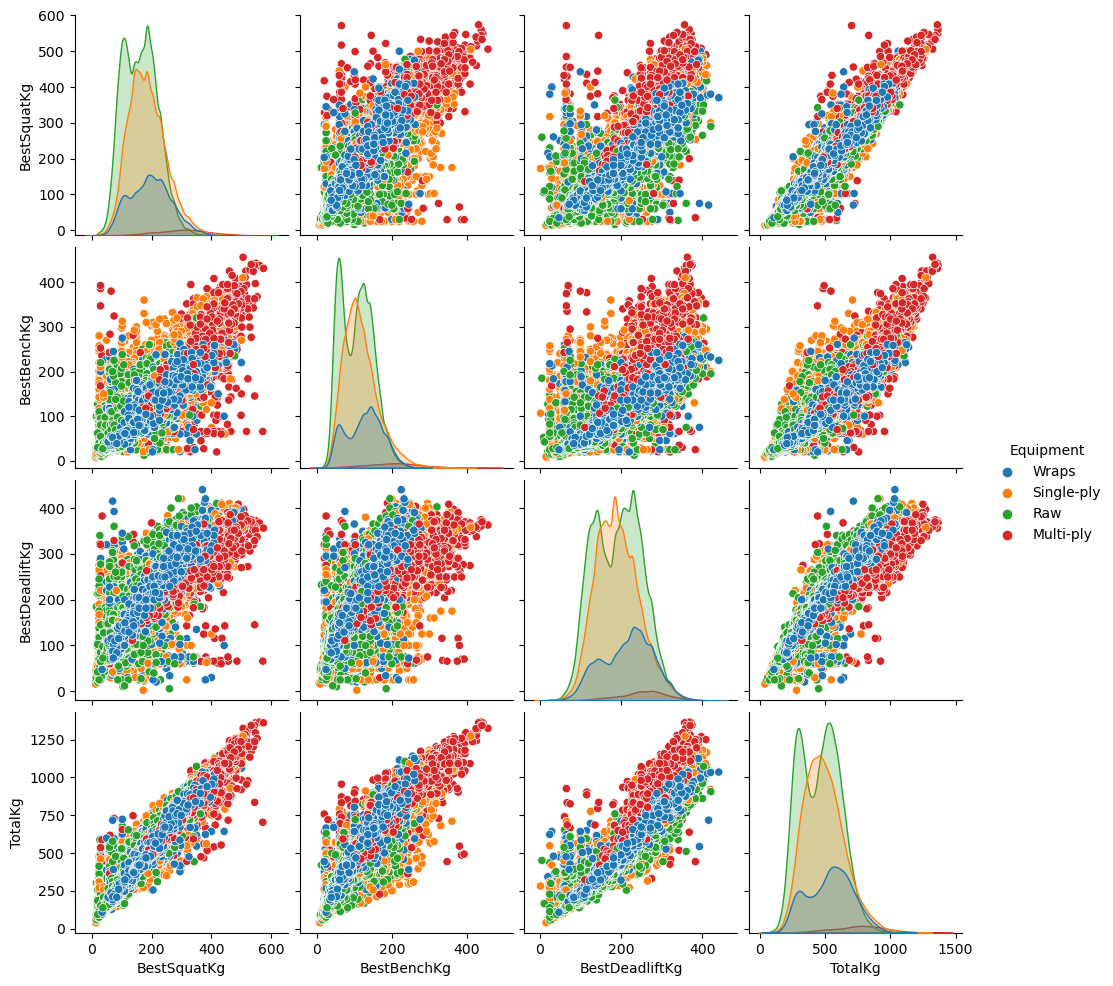

In [41]:
sns.pairplot(complete_lifts[['BestSquatKg', 'BestBenchKg', 'BestDeadliftKg', 'TotalKg', 'Equipment']], hue='Equipment')
plt.show()

I am fairly certain that the bimodality above is due to male/female.  curious why multiply has a smooth curve.  be sure to control for sex when determining the impact 

In [130]:
print(complete_lifts.groupby(['Equipment', 'Sex'])['TotalKg'].describe())
print(complete_lifts.groupby(['Equipment', 'Sex'])['BestBenchKg'].describe())
print(complete_lifts.groupby(['Equipment', 'Sex'])['BestSquatKg'].describe())
print(complete_lifts.groupby(['Equipment', 'Sex'])['BestDeadliftKg'].describe())

                  count        mean         std     min      25%     50%  \
Equipment  Sex                                                             
Multi-ply  F      738.0  470.328442  121.675401  117.50  385.625  474.00   
           M     4392.0  799.692065  176.502694  175.00  689.460  800.00   
Raw        F    45108.0  298.957785   66.409433   54.00  255.000  295.00   
           M    87371.0  540.646436  118.774678   55.00  465.000  540.00   
Single-ply F    12839.0  345.977904   96.172494   40.80  279.500  335.00   
           M    91812.0  511.824007  150.441084   38.60  403.700  498.95   
Wraps      F    10875.0  324.197191   81.102760   86.18  267.500  315.00   
           M    33053.0  606.587188  135.159766   70.00  517.500  602.50   

                   75%      max  
Equipment  Sex                   
Multi-ply  F    552.50   816.47  
           M    913.99  1365.31  
Raw        F    340.00   730.28  
           M    615.00  1105.00  
Single-ply F    402.50   763.00  
 

In [131]:
print(complete_lifts.groupby(['Level', 'Sex'])['TotalKg'].describe())
print(complete_lifts.groupby(['Level', 'Sex'])['BestBenchKg'].describe())
print(complete_lifts.groupby(['Level', 'Sex'])['BestSquatKg'].describe())
print(complete_lifts.groupby(['Level', 'Sex'])['BestDeadliftKg'].describe())

               count        mean         std    min     25%     50%     75%  \
Level   Sex                                                                   
Juniors F    10969.0  313.250499   72.839285  88.45  265.00  305.00  350.50   
        M    31786.0  558.464703  123.348621  60.00  480.00  552.50  632.50   
Masters F    11243.0  299.426949   79.209545  90.00  245.00  290.00  342.50   
        M    24160.0  556.162607  134.542271  75.00  465.00  555.00  642.50   
Open    F    25324.0  332.222748   82.501804  72.60  275.00  320.00  376.48   
        M    56650.0  622.539546  142.765480  75.00  525.00  610.00  707.50   
Special F     4183.0  288.656266   61.250284  70.31  249.48  283.50  324.32   
        M    10985.0  553.334270  113.098096  69.99  483.08  548.85  623.69   
Teen    F     4851.0  300.056395   77.841612  40.80  247.50  290.00  346.25   
        M    11659.0  490.995036  120.386175  38.60  410.50  490.00  567.50   
Youth   F      920.0  252.551174   81.187492  54.00 

In [85]:
eda_subset = complete_lifts[complete_lifts['Sex'].str.lower() == 'm']

In [132]:
print(complete_lifts.groupby(['Equipment','Level'])['TotalKg'].describe())
print(complete_lifts.groupby(['Equipment','Level'])['BestBenchKg'].describe())
print(complete_lifts.groupby(['Equipment','Level'])['BestSquatKg'].describe())
print(complete_lifts.groupby(['Equipment','Level'])['BestDeadliftKg'].describe())

                      count        mean         std     min       25%     50%  \
Equipment  Level                                                                
Multi-ply  Juniors    287.0  722.358780  185.201870  175.00  623.6900  739.35   
           Masters   1076.0  678.364312  181.207295  117.50  546.5800  700.90   
           Open      2519.0  793.319444  202.152660  155.36  668.2750  814.20   
           Special    640.0  676.184703  157.545290  222.26  576.0600  706.47   
           Teen       155.0  580.351226  172.309464  185.00  473.7500  605.00   
           Youth        1.0  405.000000         NaN  405.00  405.0000  405.00   
Raw        Juniors  27782.0  475.321198  142.756709   60.00  352.5000  490.00   
           Masters  17905.0  420.011798  151.752734   75.00  290.0000  410.00   
           Open     45652.0  481.414346  162.028170   72.60  335.0000  490.00   
           Special   5862.0  429.783257  143.969115   69.99  294.8775  445.00   
           Teen     10075.0 

In [87]:
equipment_dummies = pd.get_dummies(complete_lifts['Equipment'], prefix='Eq')
level_dummies = pd.get_dummies(complete_lifts['Level'], prefix='Lvl')
sex_dummies = pd.get_dummies(complete_lifts['Sex'], prefix='Sx')
complete_lifts_rg = pd.concat([complete_lifts, equipment_dummies, level_dummies, sex_dummies], axis=1)

In [88]:
print(complete_lifts_rg.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286286 entries, 0 to 386383
Data columns (total 30 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          286286 non-null  int64  
 1   Name            286286 non-null  object 
 2   Sex             286286 non-null  object 
 3   Equipment       286286 non-null  object 
 4   Age             106793 non-null  float64
 5   Division        195719 non-null  object 
 6   BodyweightKg    285693 non-null  float64
 7   WeightClassKg   284483 non-null  object 
 8   BestSquatKg     286286 non-null  float64
 9   BestBenchKg     286286 non-null  float64
 10  BestDeadliftKg  286286 non-null  float64
 11  TotalKg         286188 non-null  float64
 12  Place           285551 non-null  object 
 13  Wilks           285595 non-null  float64
 14  Level           195719 non-null  object 
 15  Tier            286286 non-null  object 
 16  Level2          30099 non-null   object 
 17  Division2 

In [89]:
print(complete_lifts.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286286 entries, 0 to 386383
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MeetID          286286 non-null  int64  
 1   Name            286286 non-null  object 
 2   Sex             286286 non-null  object 
 3   Equipment       286286 non-null  object 
 4   Age             106793 non-null  float64
 5   Division        195719 non-null  object 
 6   BodyweightKg    285693 non-null  float64
 7   WeightClassKg   284483 non-null  object 
 8   BestSquatKg     286286 non-null  float64
 9   BestBenchKg     286286 non-null  float64
 10  BestDeadliftKg  286286 non-null  float64
 11  TotalKg         286188 non-null  float64
 12  Place           285551 non-null  object 
 13  Wilks           285595 non-null  float64
 14  Level           195719 non-null  object 
 15  Tier            286286 non-null  object 
 16  Level2          30099 non-null   object 
 17  Division2 

cd C:\Users\Dark\Documents\EDA_Final_Project
jupyter-nbconvert Cleaning.ipynb --to slides --post serve
